In [1]:
#Importing libraries to use.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings

In [2]:
#Opening dataset with pandas.

df = pd.read_csv('winequality.csv')

In [3]:
#checking if there are missing values in our dataset.
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,red
1,10.3,0.170,0.47,1.4,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,3,white
2,5.8,0.240,0.44,3.5,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3,white
3,6.9,0.390,0.40,4.6,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3,white
4,7.6,0.480,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3,white


## Understanding our diferent features:

 **Fixed Acidity:**
    Sum of diferent fixed acids that are present in wine. Values are is presented in `g/L`.
 
 **Volatile acidity:**
    Compounds found in the aroma but not found one the palate. Values are presented in `g/L`.
 
 **Cictric adic:**
    Acid found that is present in grapes at a low amount. Values are presented in `g/L`.
 
 **Residual Sugar:**
    Natural grape sugars leftover in a wine after the alcoholic fermentation finishes. Values are presented in `g/L`.
   
 **Chlorides:**
    Ions extracted from skins during fermentation. Values are presented in `g/L`.
 
 **Free Sulfur Dioxide:**
    React and thus exhibit both germicidal and antioxidant properties present in wine. Values are presented in `mg/L`.
    
 **Total Sulfur Dioxide:**
    Total amount of sulfur that is present in wine. Values are presented in `mg/L`.
    
  **Density:**
    Mass per unity of volume of the wine. Values are presented in `g/L`

  **pH:**
    The pH scale ranges from `0 to 14`, with `7` being neutral. pHs less than `7` are acidic while pHs greater than `7` are basic.
    
   **Sulphates:**
  Sulfites are a food preservative widely used in winemaking. Values are presented in `g/L`
  
  
   **Alcohol:** 
  Alcohol is a toxic and psychoactive substance that can be found in wine. Values are presented in `g/L`
 
   **Quality:** 
  Experts rating to the wine quality. Values might fluctuate between `0-10`
  
  **Type:**
  Wine classification nomenclature mostly based on the type of grapes used. Our CSV only contains 2 diferent types:
   **Red:** Use of red grapes for the wine fermentation.
   **White:** Use of white grapes for the wine fermentation.
 

# Objectives:

`1`. If there was no classification how would an unsupervised machine learning algorithm classify our wines based on the present data.

`2`. Creation of a prediction model with various algorithms and further analysis.

# 1.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

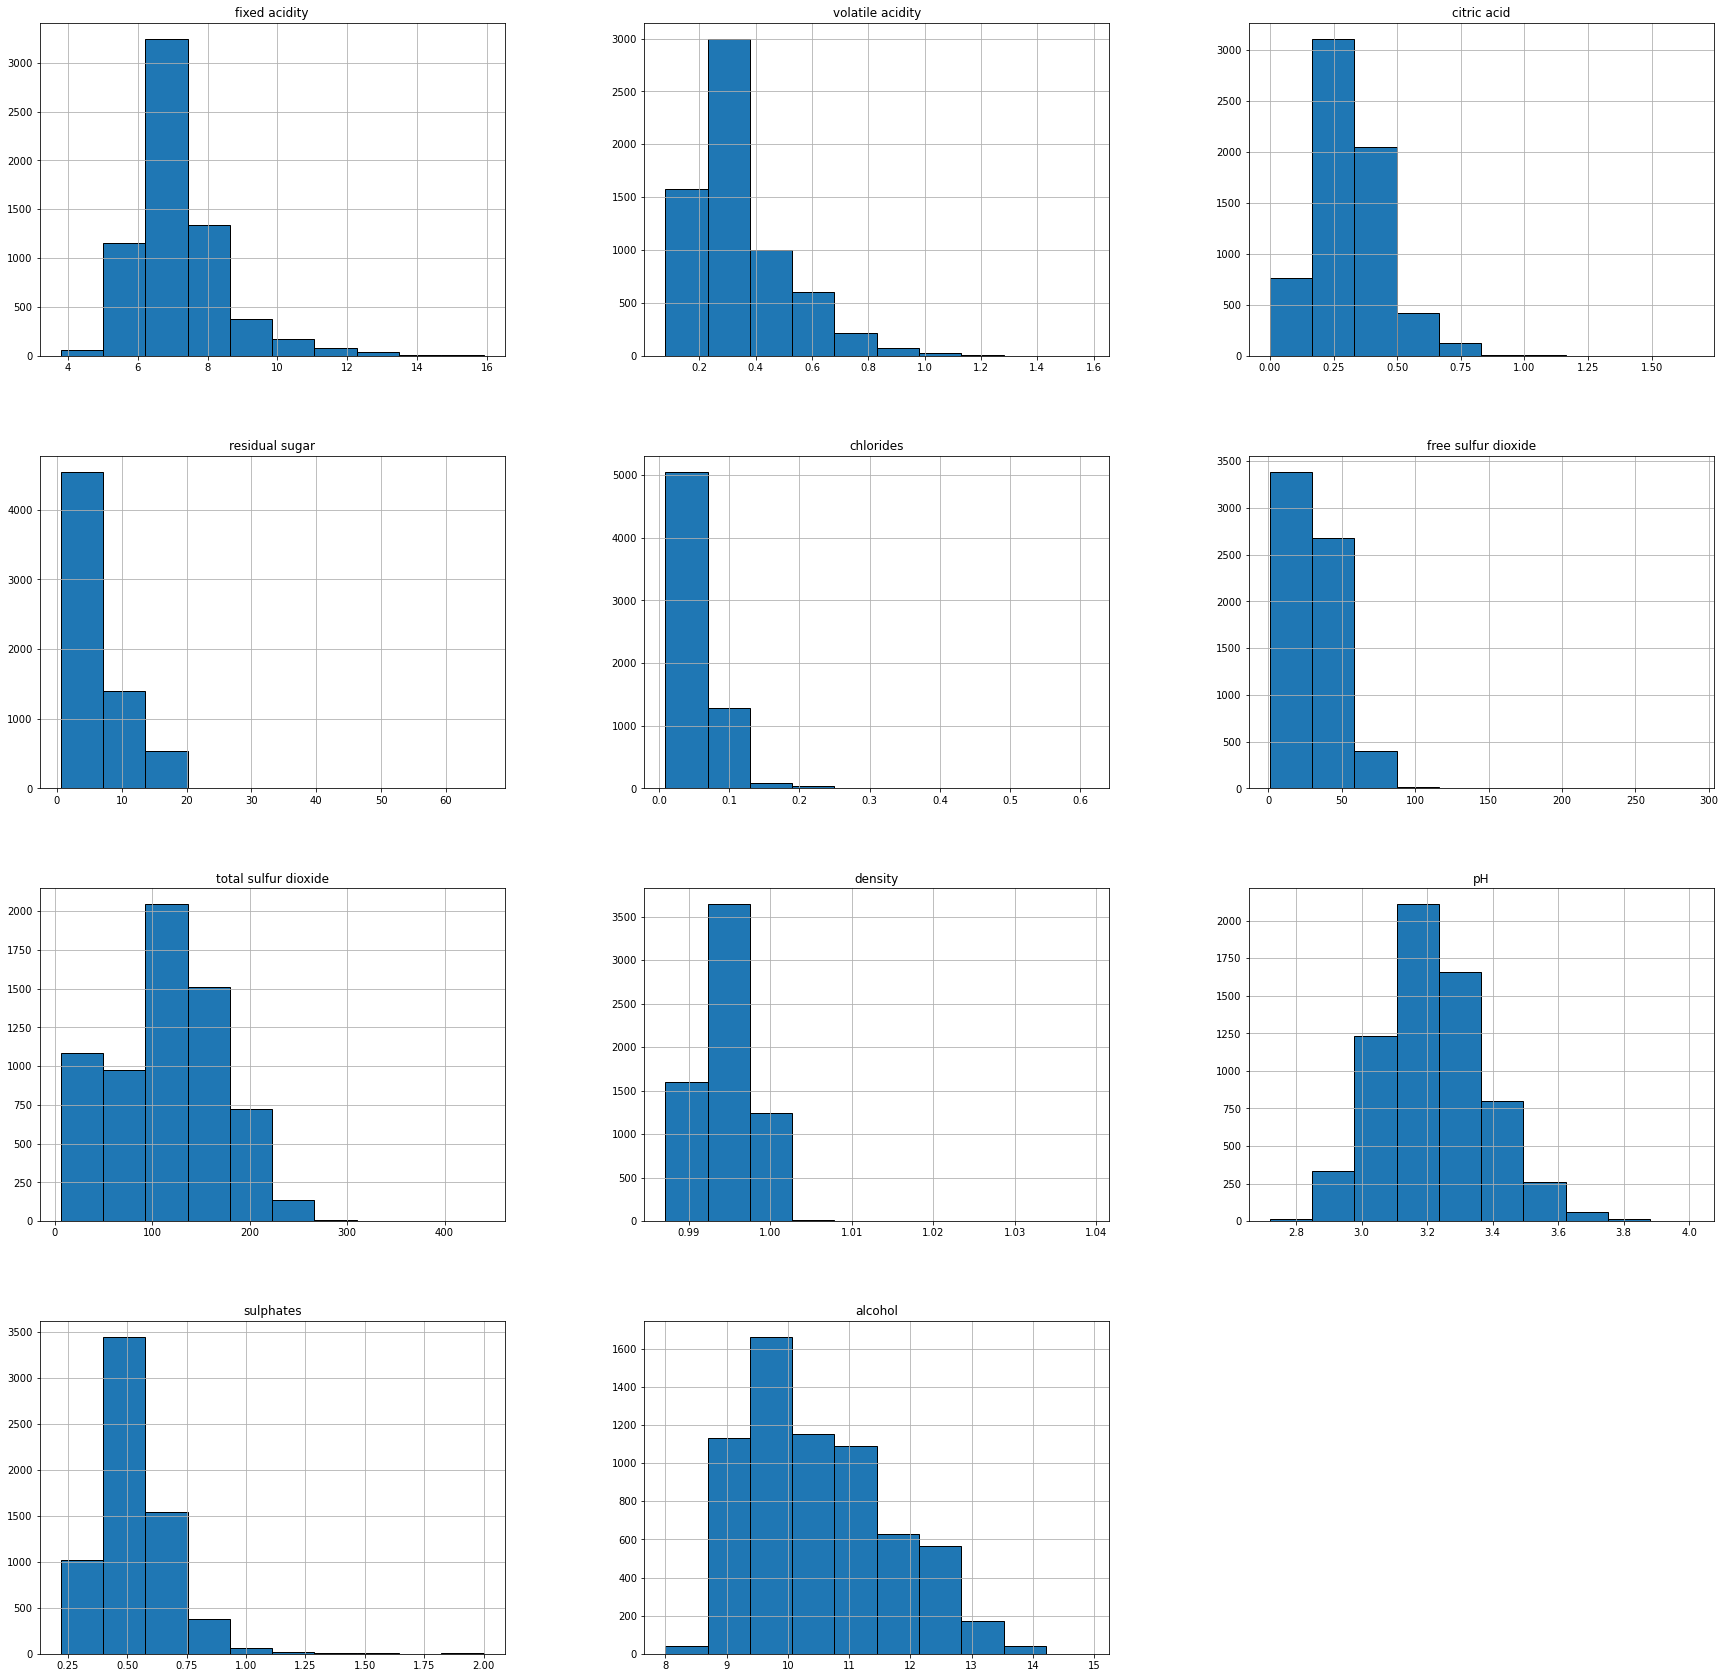

In [5]:
# Removing our last column from the dataframe
# Quality was also dropped for the purpose of this classification
#Histogram creation for a better understanding of the destribution
target = df.type
df = df.drop('type', axis=1)
df = df.drop('quality', axis=1)
df
df.hist(edgecolor="black", figsize= [30,30])

In [6]:
# Using a Scaler on the features who have the biggest range on values
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
columns = ['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','pH','alcohol']
df[columns] = standardscaler.fit_transform(df[columns])

In [7]:
# As you can see bellow our data is now ready for the creation of clusters
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.088809,0.875,0.05,0.053748,0.082,-1.550461,-1.799603,0.99808,1.129124,0.52,-0.243731
1,2.379201,0.170,0.47,-0.849952,0.037,-1.437795,-1.463541,0.99390,-2.042431,0.28,-0.747131
2,-1.091439,0.240,0.44,-0.408610,0.029,-1.437795,-0.119291,0.99130,1.937560,0.43,1.014772
3,-0.243060,0.390,0.40,-0.177431,0.022,-1.437795,-1.711166,0.99150,0.569438,0.37,1.769873
4,0.296817,0.480,0.37,-0.891985,0.034,-1.437795,-1.039041,0.99256,-1.047434,0.54,-0.075930


In [8]:
from sklearn.cluster import KMeans
wcss= []
for numberOfClusters in range(1,11):
    kmeans= KMeans(n_clusters= numberOfClusters)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

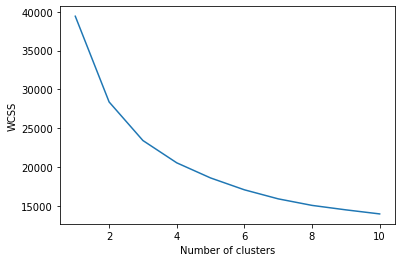

In [9]:
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Conclusion: optimal value for K is 2 or 3.

#  1.1 Let's start with the less obvious one and start with `k=3`

In [10]:
## Centroids definition
kmeans = KMeans(n_clusters=3, random_state=13).fit(df)
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)
centroids

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.004290,0.482801,0.297142,-0.610773,0.081207,-0.917622,-1.150654,0.996418,0.246145,0.621414,-0.169208
1,-0.192267,0.285331,0.352082,1.164762,0.053313,0.881507,0.956859,0.996862,-0.430314,0.492138,-0.784762
2,-0.455195,0.292967,0.308538,-0.427543,0.043263,-0.058564,0.026394,0.992245,0.146024,0.505226,0.626004


In [11]:
labelsClusters = pd.DataFrame(kmeans.labels_)
labelsClusters.value_counts()

#We could compare the value counts between the original labels and our occurences with our new groups...
#but that wouldn't make much sense would it?

2    2880
1    1936
0    1676
dtype: int64

In [12]:
df['type'] = target
df['cluster'] = kmeans.labels_
group0 = df[df.cluster ==0]
group1 = df[df.cluster ==1]
group2 = df[df.cluster ==2]

print('Group 0:')
print(group0.type.value_counts())

print('Group 1:')
print(group1.type.value_counts())

print('Group 2:')
print(group2.type.value_counts())


Group 0:
red      1371
white     305
Name: type, dtype: int64
Group 1:
white    1915
red        21
Name: type, dtype: int64
Group 2:
white    2673
red       207
Name: type, dtype: int64


## What can we conclude so far?

 1. The **cluster classification** isn't about the color of the grapes used to make the wine.
 2. `Group 0` is mostly **red wine**, `group 1` and  `group 2` are mostly **white wine**.
 
  **What about now?**
   
 
 1. Let's revert our clusters values back to the inicial numbers.
 2. Try to make any possible conclusions of it.

In [13]:
##Invert Scaler

X_orig = standardscaler.inverse_transform(centroids[['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','pH','alcohol']])
centroids_og= pd.DataFrame(X_orig, columns=['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','pH','alcohol'])
centroids_og['volatile acidity'] = centroids['volatile acidity']
centroids_og['citric acid'] = centroids['citric acid']
centroids_og['chlorides'] = centroids['chlorides']
centroids_og['density'] = centroids['density']
centroids_og['sulphates'] = centroids['sulphates']

In [14]:
centroids_og

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,alcohol,volatile acidity,citric acid,chlorides,density,sulphates
0,8.517303,2.538067,14.233890,50.689737,3.258013,10.288823,0.482801,0.297142,0.081207,0.996418,0.621414
1,6.965857,10.986441,46.171229,169.842459,3.149236,9.555148,0.285331,0.352082,0.053313,0.996862,0.492138
2,6.624948,3.409913,29.483507,117.236632,3.241913,11.236631,0.292967,0.308538,0.043263,0.992245,0.505226


## Conclusions from `Objective 1 with 3 clusters`: 

1. Wines from `Group 0` are characterized by a higher concentration of fixed acidity, low residual sugar, low sulfur dioxide, a higher volatile acidity, an avarage amount of citric acid and higher number of chlorides and sulphates.
2. Wines from `Group 1` are characterized by a lower fixed acidity and high amount of residual sugars and sulfure dioxide concentration, higher acidity and more citric acid, the lowest pH and alchol percentage, low volatile acidity, avarege amount of chlorides and low on sulphates.
3. Wines from `Group 2` lack the presence of chlorides and sulphates and have the highest alcohol percentage.
4. To sum up, `Group 0` wines are more acid and will stay good over the years. `Group 1` wines have a good balance between sweet and acidic flavours, although they are gonna burn out quickly. `Group 2` does look like the most balanced group.
5. To add up, it's always nice to try the bring together new systems of classification to the proposed subject.

# 1.2 Now let's try with `k=2`

In [15]:
#Let's remove the cluster column
df = df.drop("cluster", axis=1)
df = df.drop("type", axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.088809,0.875,0.05,0.053748,0.082,-1.550461,-1.799603,0.99808,1.129124,0.52,-0.243731
1,2.379201,0.170,0.47,-0.849952,0.037,-1.437795,-1.463541,0.99390,-2.042431,0.28,-0.747131
2,-1.091439,0.240,0.44,-0.408610,0.029,-1.437795,-0.119291,0.99130,1.937560,0.43,1.014772
3,-0.243060,0.390,0.40,-0.177431,0.022,-1.437795,-1.711166,0.99150,0.569438,0.37,1.769873
4,0.296817,0.480,0.37,-0.891985,0.034,-1.437795,-1.039041,0.99256,-1.047434,0.54,-0.075930
...,...,...,...,...,...,...,...,...,...,...,...
6487,-1.245689,0.210,0.40,-0.870969,0.041,2.843519,0.552834,0.99010,0.009751,0.95,0.930872
6488,-1.091439,0.170,0.34,-0.765887,0.045,3.688515,0.959646,0.99035,1.004749,0.90,1.098672
6489,-1.091439,0.170,0.34,-0.765887,0.045,3.688515,0.959646,0.99035,1.004749,0.90,1.098672
6490,-0.397311,0.240,0.30,-0.335053,0.042,4.195513,1.118833,0.99189,-1.109621,0.59,0.679171


In [16]:
## Centroids definition with k=2
kmeans2 = KMeans(n_clusters=2, random_state=15).fit(df)
centroids2 = kmeans2.cluster_centers_
centroids2 = pd.DataFrame(kmeans2.cluster_centers_, columns=df.columns)
centroids2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.151676,0.373612,0.303792,-0.540769,0.058406,-0.495171,-0.522938,0.993833,0.197897,0.553537,0.356808
1,-0.257415,0.282142,0.343681,0.917756,0.052068,0.840371,0.887496,0.996170,-0.335857,0.493610,-0.605550


In [17]:
df['type'] = target
df['cluster'] = kmeans2.labels_
group0 = df[df.cluster ==0]
group1 = df[df.cluster ==1]

print('Group 0:')
print(group0.type.value_counts())

print('Group 1:')
print(group1.type.value_counts())


Group 0:
white    2519
red      1570
Name: type, dtype: int64
Group 1:
white    2374
red        29
Name: type, dtype: int64


It seem's like most of the `red wine` will fall into `Group 0` while `white wine` is evenly split into `both groups`.
Let's revert our values to their original state and try to find some explanations.

In [18]:
##Invert Scaler

X_orig = standardscaler.inverse_transform(centroids2[['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','pH','alcohol']])
centroids_og2= pd.DataFrame(X_orig, columns=['fixed acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','pH','alcohol'])
centroids_og2['volatile acidity'] = centroids2['volatile acidity']
centroids_og2['citric acid'] = centroids2['citric acid']
centroids_og2['chlorides'] = centroids2['chlorides']
centroids_og2['density'] = centroids2['density']
centroids_og2['sulphates'] = centroids2['sulphates']
centroids_og2

,fixed acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,alcohol,volatile acidity,citric acid,chlorides,density,sulphates
0,7.411812,2.871163,21.733048,86.178947,3.250255,10.915777,0.373612,0.303792,0.058406,0.993833,0.553537
1,6.881388,9.811134,45.441005,165.920856,3.164425,9.768749,0.282142,0.343681,0.052068,0.996170,0.493610


# Conclusions from `Objective 1 with 2 clusters`:

1. `Group 0` wines seem to have lower residual sugar and sulfur dioxide when compared to those from `group 1`. They also have an higher alchol percentage, what probably indicates we are in the presence of `mature wine`.
2. Wines from `group 1` have a lot of sugar and sulfur dioxide. They also have a lower alchol volume, what indicates they are probably `green wine`.
3. We weren't expecting that our cluster groups would be matching the `targets`, since there's only a small correlation between the `features` and the `targets` and it isn't clear by the color of the grapes.

# 2.

In [19]:
#Opening another instance of the csv

df2 = pd.read_csv('winequality.csv')

In [20]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,red
1,10.3,0.170,0.47,1.40,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,3,white
2,5.8,0.240,0.44,3.50,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3,white
3,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3,white
4,7.6,0.480,0.37,1.20,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,5.6,0.210,0.40,1.30,0.041,81.0,147.0,0.99010,3.22,0.95,11.6,8,white
6488,5.8,0.170,0.34,1.80,0.045,96.0,170.0,0.99035,3.38,0.90,11.8,8,white
6489,5.8,0.170,0.34,1.80,0.045,96.0,170.0,0.99035,3.38,0.90,11.8,8,white
6490,6.7,0.240,0.30,3.85,0.042,105.0,179.0,0.99189,3.04,0.59,11.3,8,white


# 2.1 Let's start with a logistic regression alrgorithm for both type and rating

In [21]:
# Declaration of arrays to store our test scores
myTypeScores = []
myQualityScores = []
X1=df2.drop(['type','quality'], axis=1)
y1=df2['type']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 13)

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=6492)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score

from sklearn.metrics import accuracy_score
print('Accuracy is:',accuracy_score(y_pred,y_test))
myTypeScores.append(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         red       0.98      0.96      0.97       335
       white       0.99      0.99      0.99       964

    accuracy                           0.99      1299
   macro avg       0.98      0.98      0.98      1299
weighted avg       0.99      0.99      0.99      1299

Accuracy is: 0.9861431870669746


### Before jumping with conlusions it is import to understand our metrics:

1. `Precision`: For all instances classified as positive, what percent of them are correct.
2. `Recall`: For all instances that were actually positive, what percent of them were classified correctly?
3. `F1-score`: F1 scores are lower than accuracy measures as they embed precision and recall into their computation.
4. `Support`: Support is the number of actual occurrences of the class in the specified dataset.

#### Since we have an accuracy of `0.9861431870669746` this does prove to be a good algorythm for wine type classification.

In [23]:
X2=df2.drop(['type','quality'], axis=1)
y2=df2['quality']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.4, random_state = 15)

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(max_iter=20000)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    # Summary of the predictions made by the classifier
    print(classification_report(y_test, y_pred))
    # Accuracy score

    from sklearn.metrics import accuracy_score
    print('Accuracy is:',accuracy_score(y_pred,y_test))
    myQualityScores.append(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00       101
           5       0.58      0.61      0.59       815
           6       0.53      0.72      0.61      1142
           7       0.50      0.21      0.30       444
           8       0.00      0.00      0.00        81

    accuracy                           0.54      2597
   macro avg       0.27      0.26      0.25      2597
weighted avg       0.50      0.54      0.50      2597

Accuracy is: 0.5417789757412399


## What can we conclude from this prediction model when applied to rating?

1. Our `accuracy` of `0.5356776180698152` does look like head or tails, although those decimal places are favoring sucess.
2. We have `1.00` precision on rating the worst wines `3/10`, even if there are only a few occurences.
3. We can't have any successful precision `0.00` on wines with a classification of `4` and `8`.
4. Wines that fall into the classification  of `5` and `6` do have a positive balance on predictability: `0.58` and `0.52`, 
respectively.
5. Not a sucessful metric to classify wines that rated with `7`.
6. Overall sucess is `low`, unless we want to classify tier `3` wines, that will do.

# 2.2  What about the scores with K-Nearest Neighbors technique?

In [25]:
X1=df2.drop(['type','quality'], axis=1)
y1=df2['type']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 13)

In [26]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
# Accuracy score
print('Accuracy is:',accuracy_score(y_pred,y_test))
myTypeScores.append(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         red       0.93      0.85      0.89       509
       white       0.95      0.98      0.96      1439

    accuracy                           0.94      1948
   macro avg       0.94      0.91      0.92      1948
weighted avg       0.94      0.94      0.94      1948

Accuracy is: 0.9425051334702259


## Jumping into analysis and conclusions when `y="type"`:

1. We have a precision of `0.93` on guessing red wine and `0.95` on white wine.
2. We have a good `accuracy` on predicting the wine type: `0.9425051334702259`, although this technique does provide worse results when compared to a logistic regression.

In [27]:
#What about the quality?

X1=df2.drop(['type','quality'], axis=1)
y1=df2['quality']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 13)

In [28]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    # Summary of the predictions made by the classifier
    print(classification_report(y_test, y_pred))
    # Accuracy score
    print('Accuracy is:',accuracy_score(y_pred,y_test))
    myQualityScores.append(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.12      0.08      0.10        63
           5       0.46      0.50      0.48       648
           6       0.51      0.56      0.53       865
           7       0.36      0.28      0.31       302
           8       0.23      0.05      0.08        58

    accuracy                           0.46      1948
   macro avg       0.28      0.24      0.25      1948
weighted avg       0.44      0.46      0.45      1948

Accuracy is: 0.4620123203285421


## Now our variable in `y="rating"`:

1. Our overall accuracy is bellow `0.5` what means we aren't in the presence of a good prediction model.
2. Only positive guesses on wines where `rating = 6`.
3. `0` guesses when wines are of `rating = 3`.
4. All other ratings have an unflavoured guessing (`precision<0.5`).

# 2.3 It's time for SVM (Support Vector Machines)

In [29]:
#guessing the type first:

X1=df2.drop(['type','quality'], axis=1)
y1=df2['type']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 13)

In [30]:
classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('Accuracy is:',accuracy_score(y_pred,y_test))
myTypeScores.append(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         red       0.95      0.79      0.86       509
       white       0.93      0.98      0.96      1439

    accuracy                           0.93      1948
   macro avg       0.94      0.89      0.91      1948
weighted avg       0.93      0.93      0.93      1948

Accuracy is: 0.9332648870636551


## Jumping into analysis and conclusions when `y="type"`:

1. We have a precision of `0.95` on guessing red wine and `0.93` on white wine.
2. We have a good `accuracy` on predicting the wine type: `0.9332648870636551`, although this technique does provide worse results when compared to a `logistic regression` or a `K-Nearest Neighbors` technique.

In [31]:
#Now for the quality:

X1=df2.drop(['type','quality'], axis=1)
y1=df2['quality']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 13)

In [32]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    classifier = SVC()
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    # Summary of the predictions made by the classifier
    print(classification_report(y_test, y_pred))
    print('Accuracy is:',accuracy_score(y_pred,y_test))
    myQualityScores.append(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        63
           5       0.50      0.00      0.01       648
           6       0.44      1.00      0.61       865
           7       0.00      0.00      0.00       302
           8       0.00      0.00      0.00        58

    accuracy                           0.44      1948
   macro avg       0.16      0.17      0.10      1948
weighted avg       0.36      0.44      0.28      1948

Accuracy is: 0.44455852156057496


##  Now when we assign `rating` to y:

1. Our overall accuracy is bellow `0.5` what means we aren't in the presence of a good prediction model.
2. No positive balance on any rating.
3. `0` guesses when wines are in `rating = [3,4,7,8]`.
4. All other ratings have an unflavoured guessing (`precision<=0.5`).

# 2.4 Decision Trees:

In [33]:
#guessing the type first:

X1=df2.drop(['type','quality'], axis=1)
y1=df2['type']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 13)

In [34]:
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print('Accuracy is:',accuracy_score(y_pred,y_test))
myTypeScores.append(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         red       0.97      0.95      0.96       509
       white       0.98      0.99      0.99      1439

    accuracy                           0.98      1948
   macro avg       0.98      0.97      0.98      1948
weighted avg       0.98      0.98      0.98      1948

Accuracy is: 0.981006160164271


## Analysis for type prediction:

1. We have an accuracy of `0.97` for red wine and `0.98` for white wine.
2. We have an overall accuracy of `0.9820328542094456` falling only in favour to our logistic regression alrgorithm.

In [35]:
#Guessing the quality:

X1=df2.drop(['type','quality'], axis=1)
y1=df2['quality']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 13)

In [36]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    # Summary of the predictions made by the classifier
    print(classification_report(y_test, y_pred))
    print('Accuracy is:',accuracy_score(y_pred,y_test))
    myQualityScores.append(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.17      0.19      0.18        63
           5       0.63      0.63      0.63       648
           6       0.63      0.59      0.61       865
           7       0.48      0.52      0.50       302
           8       0.31      0.43      0.36        58

    accuracy                           0.57      1948
   macro avg       0.37      0.39      0.38      1948
weighted avg       0.58      0.57      0.57      1948

Accuracy is: 0.5723819301848049


## Analysis of rating prediction:

1. We have an overall accuracy of `0.5764887063655031`, what proves to be the best result for rating so far.
2. We have a precision of `0.00` for wines classified as `3` in terms of quality.
3. We still have poor results for wines that fell into the rating of `[4,7,8]`.
4. Wines with a rating of `5` and `6` do have a somewhat good precision: `0.63 `.

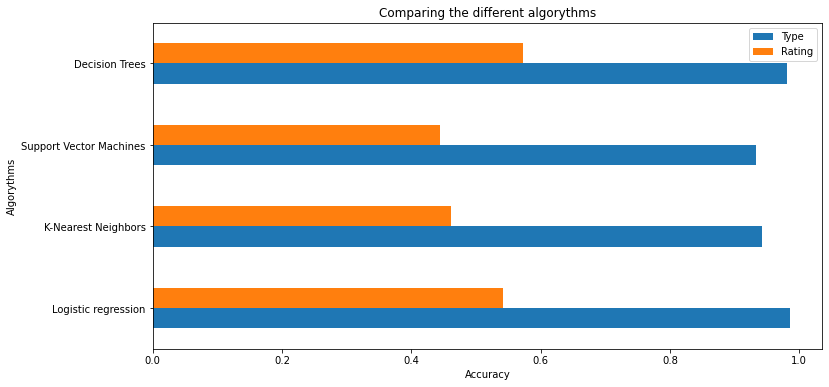

In [38]:
algorythms = ['Logistic regression', 'K-Nearest Neighbors', 'Support Vector Machines', 'Decision Trees']
chart_data = {'Type': myTypeScores, 'Rating': myQualityScores}
data_frame = pd.DataFrame(
    chart_data, columns=['Type', 'Rating'], index=algorythms)
data_frame.plot.barh(figsize=(12,6))

plt.ylabel('Algorythms')
plt.xlabel('Accuracy')
plt.title('Comparing the different algorythms')
plt.show()

# Conclusions:

1. `Decision Trees` present the most balanced accuracy results at both `Type` and `Rating` classification.

2. Even so, `Logistic Regression` had the best accuracy at predicting the Type.

3. `Type` is clearly predictable my all the the different algorythms.

4. `Rating` is kinda subjective, and makes sense most algorythms lack the capacity at matching our `features` to a specific `Rating` label.